# ZOO ANIMAL CLASSIFICATION 




##  Objective

To develop a model to predict the class of 101 animals given 18 features.

Dataset : The dataset used for this work consists of information on 101 animals from a Zoo. Each animal belongs to one of the following 7 classes : mammal, bird, reptile, fish, amphibian, bug, and invertebrate.
The predictors are described below:

1. animal_name
2. hair
3. feathers
4. eggs
5. milk
6. airborne
7. aquatic
8. predator
9. toothed
10. backbone
11. breathes
12. Venomous
13. fins
14. legs
15. tail
16. domestic
17. catsize

Acknowledgements

Source:UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Zoo

Creator:Richard Forsyth

Donor: Richard S. Forsyth
8 Grosvenor Avenue
Mapperley Park
Nottingham NG3 5DX
0602-621676



1. Importing Libraries

In [1]:
import pandas as pd #Loading pandas
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the data 
data=pd.read_csv("zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
data.shape # check the number of rows and columns in dataset

(101, 18)

In [4]:
data['class_type'].unique() # check the unique class of the response variable

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [5]:
#  Store the namess of the features and class of the animals
feature_cols=['hair','feathers', 'eggs', 'milk', 'airborne','aquatic','predator','toothed', 'backbone', 'breathes', 'venomous', 'fins','legs','tail','domestic','catsize']

class_type1=['Mammal','Bird','Reptile','Fish','Amphipian','Bug','Invertebrate']


In [6]:
data.info()  #view information on the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
# Save the data without index
data.to_csv('data_noindex.csv',index=False)
data_withoutindex=pd.read_csv("data_noindex.csv")


## 2. Data Visualization

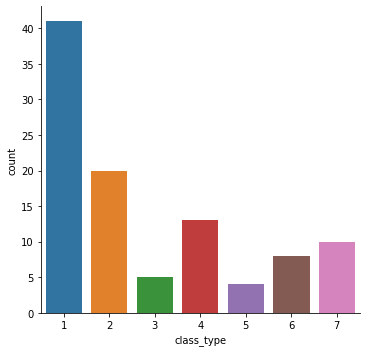

In [8]:
#Barchat showing the number of animals per category
sns.catplot(x="class_type", kind="count",data=data_withoutindex)

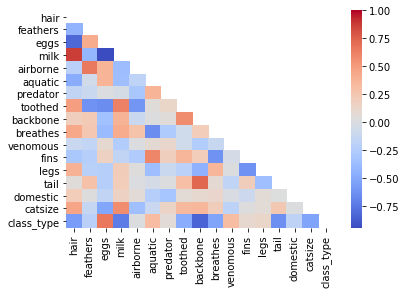

In [9]:
# Correlation Heatmap
matrix = np.triu(data.corr())
sns.heatmap(data.corr(),mask=matrix, cmap = 'coolwarm')


# 3.1 Preparing Data for Modeling & Analysis

In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import accuracy_score,recall_score,balanced_accuracy_score,mean_squared_error,confusion_matrix,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn import metrics 
from sklearn import linear_model
from sklearn.svm import SVC


In [11]:
# Extracting the features
X=data.iloc[:,1:17]
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [12]:
# Exract the response variable
Y=data.iloc[:,17]
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

In [13]:
# Reshuffle data for analysis
from sklearn.utils import shuffle
data_new=shuffle(data_withoutindex,random_state=28)
data_new['class_type']

76    3
14    7
0     1
95    2
13    7
     ..
3     1
32    1
22    1
5     1
1     1
Name: class_type, Length: 101, dtype: int64

In [14]:
# Divinding data into 70% trainset and 30% testset
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.30, random_state=13, stratify=Y)


In [15]:
X_train.head() # Preview the trainset for the features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
59,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0


In [16]:
y_train.head() # Preview the trainset for the response

7     4
78    2
54    1
67    1
59    2
Name: class_type, dtype: int64

In [17]:
X_test.head()  # Preview the trainset for the features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
57,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
91,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
35,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0


In [18]:
y_train.head()  # Preview the testset for the response

7     4
78    2
54    1
67    1
59    2
Name: class_type, dtype: int64

#  3.2  Data for Modeling & Analysis

# 3.21 KNN

In [19]:
# Fitting knn by first finding the best k
k_values=range(1, 51)
accuracy = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)   
    knn.fit(X_train, y_train)
    pred=knn.predict(X_test)
    accuracy_sco=accuracy_score(y_test, pred)
    accuracy.append(accuracy_sco)
accuracy



[0.9354838709677419,
 0.9032258064516129,
 0.8064516129032258,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7741935483870968,
 0.7419354838709677,
 0.7419354838709677,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7096774193548387,
 0.7419354838709677,
 0.6774193548387096,
 0.6774193548387096,
 0.6774193548387096,
 0.6774193548387096,
 0.6451612903225806,
 0.6774193548387096,
 0.6129032258064516,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5483870967741935,
 0.5161290322580645,
 0.5161290322580645,
 0.5161290322580645,
 0.5161290322580645,
 0.5161290322580645,
 0.4838709677419355,
 0.5483870967741935,
 0.5161290322580645,
 0.4838709677419355,
 0.4838709677419355,
 0.45161290322580644,
 0.419354838

Text(0, 0.5, 'Accuracy')

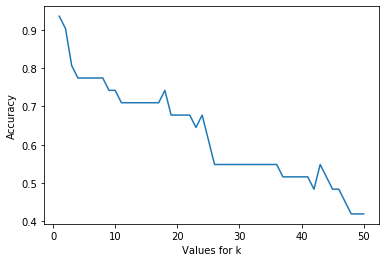

In [20]:
# Plot showing accuracy for some k
plt.plot(k_values,accuracy)
plt.xlabel('Values for k')
plt.ylabel('Accuracy')

In [21]:
# Fitting knn using best k=1
knn = KNeighborsClassifier(n_neighbors=1)   
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [22]:
# Accuracy for knn
ACC_knn=accuracy_score(y_test,y_pred_knn)
ACC_knn

0.9354838709677419

In [23]:
#Balanced Accuracy for knn
B_ACC_knn=balanced_accuracy_score(y_test,y_pred_knn)
B_ACC_knn

0.880952380952381

In [24]:
#Sensitivity
Sensitivity_knn=recall_score(y_pred_knn, y_test, average='weighted')
Sensitivity_knn

0.9354838709677419

In [25]:
#Specificity
specificity=2*B_ACC_knn-Sensitivity_knn
specificity 

0.8264208909370202

# 3.22  Decision Tree Classifier

In [26]:
# Selecting the best depth/nodes
# List values to try for the best depth
from sklearn.tree import DecisionTreeClassifier
max_depth=[]
max_values=range(1, 11)
for i in max_values:
    clf=DecisionTreeClassifier(max_depth=i, random_state=16)
    clf.fit(X_train, y_train)
    score= clf.score(X_test, y_test) # Returns the accuracy of the model
    max_depth.append(score)
max_depth

[0.6129032258064516,
 0.7419354838709677,
 0.8387096774193549,
 0.8064516129032258,
 0.9354838709677419,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871,
 0.967741935483871]

the best max_depth is: 6


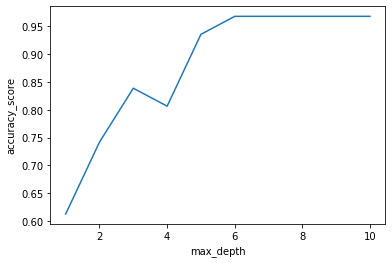

In [27]:
plt.plot(max_values,max_depth) #Clearly the best node is 6 and above 
plt.xlabel('max_depth')
plt.ylabel('accuracy_score')
print("the best max_depth is: 6")


In [28]:
# Training the decision tree using the best max_depth
DTC=tree.DecisionTreeClassifier(random_state=3, max_depth=6)
DTC=DTC.fit(X_train, y_train)

In [29]:
# Make Predition on the test data
y_predict_DTC=DTC.predict(X_test)

In [30]:
# Accuracy for Decision Tree
metrics.accuracy_score(y_test,y_predict_DTC)

0.967741935483871

In [31]:
# Sensitivity for Decision Tree
Sensitivity_DTC=recall_score(y_predict_DTC, y_test, average='weighted')
Sensitivity_DTC

0.967741935483871

In [32]:
# Balanced Accuracy for Decision Tree
B_ACC_DTC=balanced_accuracy_score(y_test,y_predict_DTC)
B_ACC_DTC

0.9523809523809524

In [33]:
# Specificity FOR Decision Tree
specificity_DTC=2*B_ACC_DTC-Sensitivity_DTC
specificity

0.8264208909370202

# 3.23 Support Vector Classifier


In [34]:
# Train the model
svc=SVC(random_state=28)
model_svc=svc.fit(X_train, y_train)

In [35]:
# predict on the test data
y_predict_svc=model_svc.predict(X_test)

In [36]:
# Accuracy of the model
metrics.accuracy_score(y_predict_svc, y_test)

0.8387096774193549

In [37]:
# Balanaced Accuracy
B_ACC_svc=balanced_accuracy_score(y_test,y_predict_svc)
B_ACC_svc

0.7509157509157509

In [52]:
# Sensitivity for Logistic
Sensitivity_svc=recall_score(y_predict_svc, y_test, average='weighted',labels=np.unique(y_predict_svc) )
Sensitivity_svc

0.8387096774193549

In [39]:
# Specificity
specificity=2*B_ACC_svc-Sensitivity_svc
specificity

0.663121824412147

#  3.24 Multinomial Logistic Model

In [40]:
# Train the logisitc model
LR_Model=linear_model.LogisticRegression(random_state=34)
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=34, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Make Prediction on the test set
LR_y_predict=LR_Model.predict(X_test)

In [53]:
# Sensitivity for Logistic
Sensitivity_LR=recall_score(LR_y_predict, y_test, average='weighted', labels=np.unique(LR_y_predict))
Sensitivity_LR

0.8709677419354839

In [43]:
# Accuracy score
LR_accuracy=accuracy_score(LR_y_predict, y_test)
LR_accuracy

0.8709677419354839

In [44]:
# Balanced Accuracy for Logisticc
B_ACC_LR=balanced_accuracy_score(y_test,LR_y_predict)
B_ACC_LR

0.7619047619047619

In [45]:
# Specificity
specificity=2*B_ACC_LR-Sensitivity_LR
specificity

0.6528417818740399

# Summary of the models and some relevant metrics

|No.|Model|Accuracy|Balanced Accuracy|Recall| Specificity|
|---|-----|--------|-----------------|-----------|----|
|1. | KNN |0.9355  |0.88095        |0.9355      |0.8264 |
|2. |Decision Tree| 0.9677|0.9524 |0.9677 |0.8264 |
|3. |Support Vector Classifier|0.8387 |0.7509  |0.8387  |0.6631  |
|4. |Multinomial Logistic Model|0.8710| 0.7619|0.8710 |0.6528| 



In [46]:
Full_DTC=tree.DecisionTreeClassifier(max_depth=6)
Full_DTC=DTC.fit(X, Y)

In [47]:
#graphical representation
import graphviz
dot_data=tree.export_graphviz(Full_DTC, 
                     out_file=None, 
                     feature_names=feature_cols,
                     class_names=class_type1,
                     filled=True,
                     rounded=True
)
graph1=graphviz.Source(dot_data)

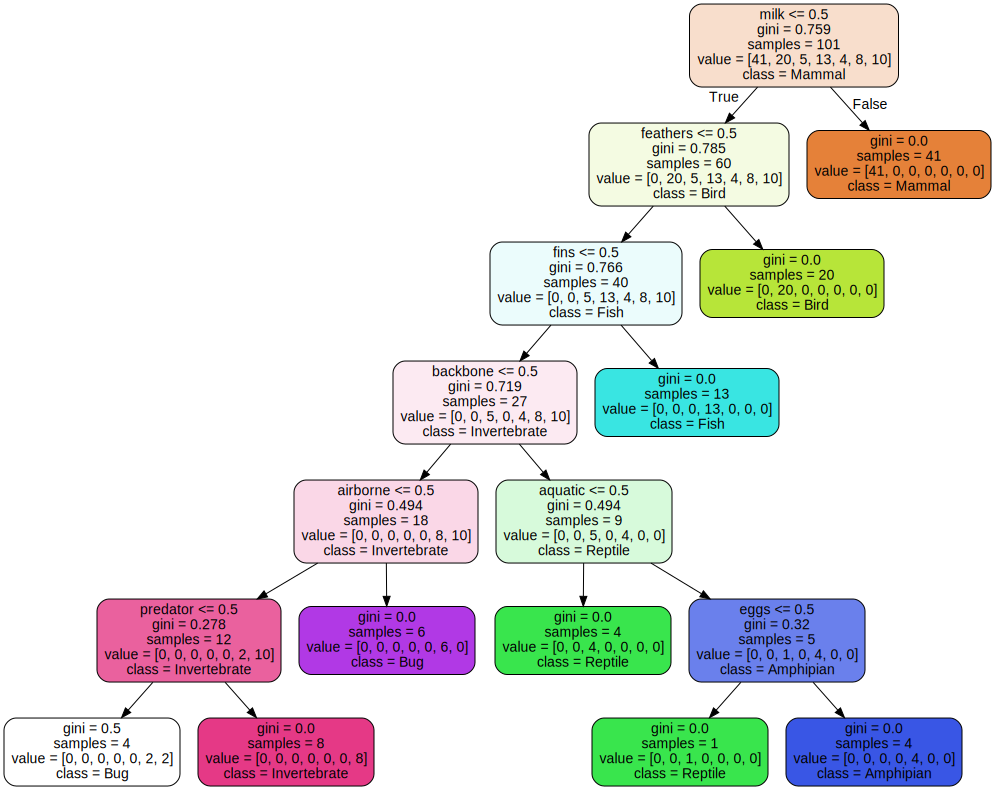

In [48]:
graph1

In [55]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_predict_DTC)
df=pd.DataFrame(conf_matrix,index=['Mammal','Bird','Reptile','Fish','Amphipian','Bug','Invertebrate'])
df.columns=['Mammal','Bird','Reptile','Fish','Amphipian','Bug','Invertebrate']
#df.rows=class_type1=['Mammal','Bird','Reptile','Fish','Amphipian','Bug','Invertebrate']
print('Confusion Matrix \n..........................................................................')
print(df)

Confusion Matrix 
..........................................................................
              Mammal  Bird  Reptile  Fish  Amphipian  Bug  Invertebrate
Mammal            13     0        0     0          0    0             0
Bird               0     6        0     0          0    0             0
Reptile            0     0        2     0          0    0             0
Fish               0     0        0     4          0    0             0
Amphipian          0     0        0     0          1    0             0
Bug                0     0        0     0          0    2             0
Invertebrate       0     0        0     0          0    1             2
